<a href="https://colab.research.google.com/github/hwon820/Python_DataAnalysis/blob/main/chpater4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##031. 데이터를 읽어들이고 확인

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd

uselog = pd.read_csv('/content/gdrive/MyDrive/파이썬 데이터분석/pyda100-master/4장/use_log.csv')
uselog.isnull().sum()

Mounted at /content/gdrive


log_id         0
customer_id    0
usedate        0
dtype: int64

In [ ]:
customer = pd.read_csv('/content/gdrive/MyDrive/파이썬 데이터분석/pyda100-master/4장/customer_join.csv')
customer.isnull().sum()

#두 데이터 모두 이상한 결측치X

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

##032. 클러스터링으로 회원 그룹화

In [ ]:
#클러스터링용 데이터 추출
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


###K-means Algorithm: K개의 군집으로 묶는 알고리즘


* 비지도 학습에 속함
*   변수 간의 거리를 기반으로 그룹화를 진행하는 가장 전통적인 클러스터링 방법
*   그룹화하고자 하는 수를 미리 지정 -> 예제에선 4개의 그룹


> 과정
- (1) K개의 임의의 중심점 배치 후
각 데이터들을 가장 가까운 중심점으로 할당(군집을 형성)
- (2) 군집으로 지정된 데이터들을 기반으로 해당 군집의 중심점 업데이트
- (3) 2번, 3번 단계를 수렴이 될 때까지, 즉 더이상 중심점이 업데이트 되지 않을 때까지 반복


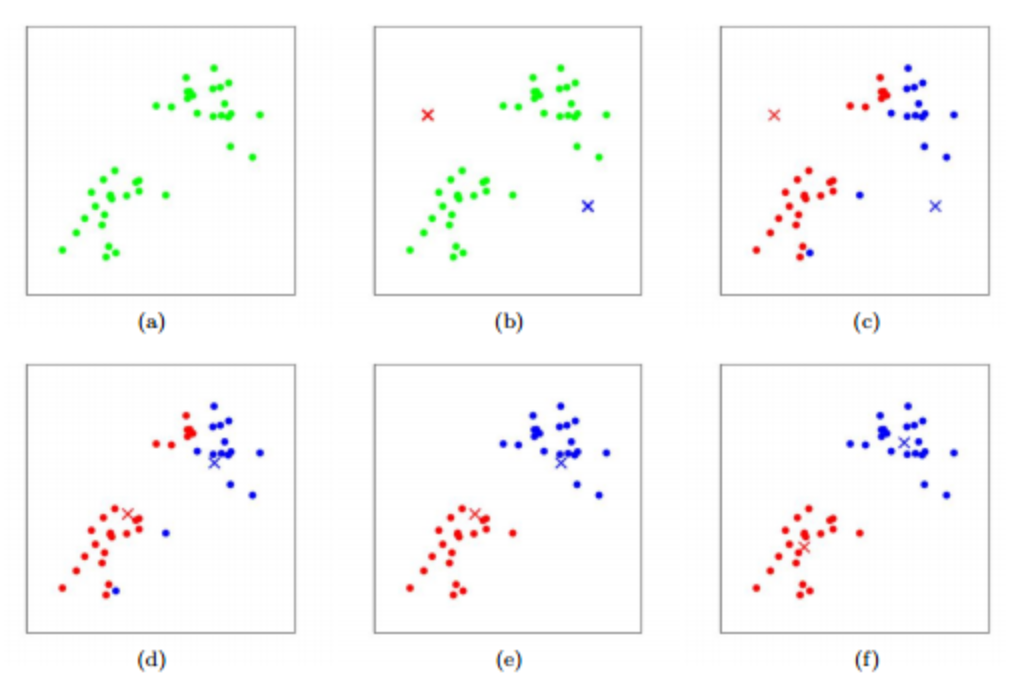







### 표준화: 데이터가 정규분포를 따른다는 가정 하에 평균이 0, 표준편차가 1이 되도록 만들어주는 것. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# mean, median. max, min -> 1~8 사이 값
# membership_period      -> 최댓값이 47
# membership_period에 의해 결과가 좌지우지되기 때문에 표준화 진행
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

#K-Means model 정의 
kmeans = KMeans(n_clusters = 4, random_state = 0)   
#n_clusters: 나눌 군집 개수   |   random_state: 호출할 때마다 동일한 결과를 호출하도록 함

clusters = kmeans.fit(customer_clustering_sc)       #데이터를 이영해 클러스터링 모델 구축
customer_clustering["cluster"] = clusters.labels_   #원래 데이터에 클러스터링 결과 반영
print(customer_clustering["cluster"].unique())
customer_clustering.head()

#0, 1, 2, 3   ->    4개의 군집으로 나누어짐

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 3 0]


<ipython-input-4-e8cc77477ffd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering["cluster"] = clusters.labels_   #원래 데이터에 클러스터링 결과 반영


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [ ]:
print(clusters.labels_)

[1 1 1 ... 0 0 0]


##033. 클러스터링 결과 분석

In [ ]:
#혼동 방지차 column 이름 변경

customer_clustering.columns = ["월평균값", "월중앙값", "월최댓값", "월최솟값", "회원기간", "cluster"]
customer_clustering.groupby("cluster").count()  #클러스터마다 집계

# 0 그룹: 840명
# 1 그룹: 1249명
# 2 그룹: 771명
# 3 그룹: 1332명

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [ ]:
#클러스터별 특징 파악
customer_clustering.groupby("cluster").mean()

# 0 그룹: 회원기간이 짧지만 이용률이 높음
# 1 그룹: 회원기간이 길지만 이용률이 낮음
# 2 그룹: 회원기간도 짧고 이용률도 낮음
# 3 그룹: 0그룹과 1그룹 사이...?

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


##034. 클러스터링 결과 가시화

### 차원축소: 정보를 되도록 잃지 않게 하면서 새로운 축을 만드는 비지도 학습의 일종



*   차원이 증가할수록 데이터 간의 거리가 증가하기 때문에 모델의 예측 신뢰도가 떨어짐 -> 차원 축소로 데이터 크기 줄임
  - PCA: 변수 간 상관관계를 이용해 주성분 추출하는 기법. 여기서 말하는 '**주성분**'은 데이터를 축에 사영했을 때 가장 높은 분산을 가지는 데이터의 축 -> 분산이 높아야 정보의 손실 최소화

  - LDA


[차원 축소 참조](https://casa-de-feel.tistory.com/19)

In [ ]:
#주성분 분석
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components = 2)   # 데이터를 2차원으로 축소하는 model 생성
pca.fit(X)                    # 적용
x_pca = pca.transform(X)      
pca_df = pd.DataFrame(x_pca)  # dataframe으로 저장
pca_df['cluster'] = customer_clustering['cluster'] 

In [ ]:
pca_df

,0,1,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1
...,...,...,...
4187,3.027933,1.139635,0
4188,5.064720,0.769684,0
4189,3.027933,1.139635,0
4190,6.083114,0.584708,0


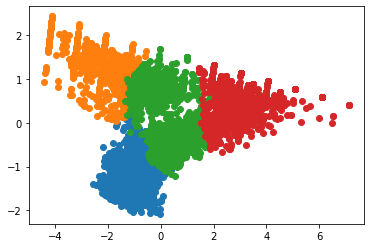

In [ ]:
#가시화

import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering['cluster'].unique():
  tmp = pca_df.loc[pca_df['cluster'] == i]
  plt.scatter(tmp[0], tmp[1])

#색이 깔끔하게 구분됨 -> 성공적인 차원축소 

##035. 클러스터링 결과를 바탕으로 탈퇴 회원의 경향 파악

In [ ]:
#탈퇴 회원과 지속 회원 집계

customer_clustering = pd.concat([customer_clustering, customer], axis = 1)  # is_deleted 변수를 가져오기 위해 customer와 결합

#cluster와 is_deleted에 따른 고객 수 집계
customer_clustering.groupby(['cluster', 'is_deleted'], as_index = False).count()[['cluster', 'is_deleted', 'customer_id']]  

# 0 그룹: 지속 회원이 압도적으로 많음
# 1 그룹: 지속 회원이 압도적으로 많음
# 2 그룹: 지속 회원 없음
# 3 그룹: 지속 회원과 탈퇴 회원의 비율이 상대적으로 비슷함

#이용 기간과 이용률 결과와 함께 고려

# 0 그룹: 회원기간이 짧지만 이용률이 높음
# 1 그룹: 회원기간이 길지만 이용률이 낮음   ->    이용률이 낮지만 안정적임(가늘고 길게)
# 2 그룹: 회원기간도 짧고 이용률도 낮음     ->    이용률도 낮고 전원 탈퇴.
# 3 그룹: 0그룹과 1그룹 사이...?

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [ ]:
#정기적/비정기적 이용 여부

customer_clustering.groupby(['cluster', 'routine_flg'], as_index = False).count()[['cluster', 'routine_flg', 'customer_id']]

# 0 그룹: 정기적으로 이용하는 회원이 많음
# 1 그룹: 정기적으로 이용하는 회원이 대다수
# 2 그룹: 비정기적으로 이용하는 회원이 2배 가까이 많음
# 3 그룹: 정기적으로 이용하는 회원이 많음

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


##036. 다음 달 이용 횟수 예측을 위한 데이터 준비

In [ ]:
#사용날짜에서 년도와 월만 추출한 변수 생성
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime("%Y%m")

#연월별 각 고객의 사용횟수 파악을 위해 그룹화
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index = False).count()
uselog_months.rename(columns = {"log_id":"count"}, inplace = True)  #log_id의 개수를 통해 이용 횟수 파악
del uselog_months["usedate"]    #usedate 삭제
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


### .loc vs .iloc



*   **iloc:** 데이터프레임의 행이나 칼럼의 순서를 나타내는 정수로 특정 값 추출
*  **loc:** 칼럼명을 직접 쓰거나 특정 조건식을 걸어 사람이 읽기 좋은 방법으로 데이터에 접근

  - df.iloc[0]: 0번째 행에 있는 값들 추출
  - df.loc[0]: 인덱스 이름이 0인 행 추출
  


In [ ]:
year_months = list(uselog_months["연월"].unique())
# ['201804', '201805', '201806', '201807', '201808', '201809',
#  '201810', '201811', '201812', '201901', '201902', '201903']
predict_data = pd.DataFrame()

for i in range(6, len(year_months)):  #201810 ~ 201903 6개월분 반영
  tmp = uselog_months.loc[uselog_months["연월"] == year_months[i]]  #현재 연월(i)와 연월이 일치하는 행을 가져와 tmp에 넣음
  tmp.rename(columns = {"count" : "count_pred"}, inplace = True)    #count는 

  #현재 연월(i) 기준 과거 6개월분의 이용 데이터 취득
  for j in range(1, 7):
    tmp_before = uselog_months.loc[uselog_months["연월"] == year_months[i-j]] #현재 연월(i) - 몇개월전(j)과 일치하는 행 가져와 tmp_before에 넣음
    del tmp_before["연월"]
    tmp_before.rename(columns = {"count" : "count_{}".format(j-1)}, inplace = True)
    tmp = pd.merge(tmp, tmp_before, on = "customer_id", how = "left")   #tmp에 tmp_before 결합 (customer_id 기준)
  
  predict_data = pd.concat([predict_data, tmp], ignore_index = True) #for문 돌때마다 predict_data update

predict_data.head()

#count_pred:예측하고 싶은 달의 데이터
#count_0: 1개월 전 ~ count_5: 6개월 전 데이터 
#결측치 -> 가입 기간이 짧아서 데이터에 존재하지 않는 경우

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [ ]:
#결측치 제거 후 index 초기화
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop = True) 
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


##037. 특징이 되는 변수 추가

In [ ]:
#회원 기간 추가 -> 시계열 변화를 확인할 수 있음
predict_data = pd.merge(predict_data, customer[['customer_id', 'start_date']], on = 'customer_id', how = 'left')
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [ ]:
#연월과 start_date의 차이로 월단위 회원기간 파악
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format = "%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

from dateutil.relativedelta import relativedelta

predict_data["period"] = None   #회원기간 초기화

for i in range(len(predict_data)):
  delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])   # i번째 행의 현재 날짜와 시작 날짜 차이 구함
  predict_data["period"][i] = delta.years*12 + delta.months                           # period column의 i번째 행에 월단위로 저장

predict_data.head()

<ipython-input-27-7b2ea79c3604>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["period"][i] = delta.years*12 + delta.months


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


##038. 다음 달 이용 횟수 예측 모델 구축

In [ ]:
#201804 이후 새로 가입한 회원만 이용 -> 오래된 회원은 가입 시기 데이터가 없거나 이용횟수가 안정적일 가능성 높아서
predict_data = predict_data.loc[predict_data["start_date"] >= pd.to_datetime("20180401")]

#LinearRegression 사용
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()

X = predict_data[["count_0", "count_1", "count_2", "count_3", "count_4", "count_5", "period"]]  # 예측에 사용할 변수 즉 설명 변수
y = predict_data["count_pred"]    # 예측할 변수 즉 목적 변수
# 학습 데이터 / 검증(평가) 데이터 나누기
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y) #분할 비율을 별도로 지정하지 않으면 75% / 25%로 분할

#모델에 학습용 데이터 적용
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#정확도 검증
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6087511390945277
0.6049001837563992


##039. 모델에 기여하는 변수 확인

In [ ]:
#설명 변수마다 기여하는 계수 출력
coef = pd.DataFrame({"feature_names": X.columns, "coefficient": model.coef_}) # 변수명과 계수를 dataframe으로 묶음
coef

# 과거로 거슬러 갈수록 기여도가 작아지는 경향 ->  이전 달의 이용 횟수가 다음 달 아용 횟수에 영향

,feature_names,coefficient
0,count_0,0.352635
1,count_1,0.179092
2,count_2,0.157491
3,count_3,0.187086
4,count_4,0.091652
5,count_5,0.063294
6,period,0.047671


##040. 다음 달 이용 횟수 예측

In [ ]:
#회원 두 명의 다음 달 이용 횟수 예측
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

model.predict(x_pred)
#첫번째 회원 3.8 회로 예측
#두번째 회원 1.9 회로 예측

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.79404062, 1.93457105])

In [ ]:
uselog_months.to_csv("use_log_months.csv", index = False)